In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

from sklearn.utils import resample
from sklearn.preprocessing import scale
from sklearn import linear_model

In [2]:
train = pd.read_pickle("train_dataset2.pkl")

In [14]:
train1 = pd.read_pickle("train_dataset.pkl")

# Boxplots - Looking at Potentially Fraudulent Providers and Distribution of Feature Values 

Text(0.5, 1.0, 'Potential Fraudulent Providers')

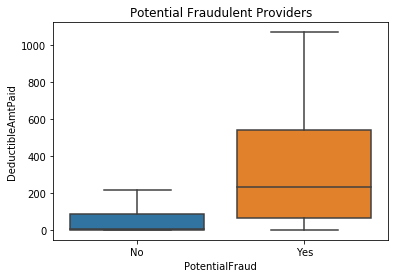

In [34]:
# Deductible Amount Paid 

sns.boxplot(x='PotentialFraud', y='DeductibleAmtPaid', data=train1, \
            showfliers=False).set_title('Potential Fraudulent Providers')

Text(0.5, 1.0, 'Potential Fraudulent Providers')

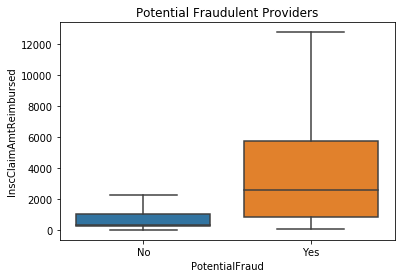

In [33]:
# Insurance Claim Amount Reimbursed

sns.boxplot(x='PotentialFraud', y='InscClaimAmtReimbursed', data=train1, \
            showfliers=False).set_title('Potential Fraudulent Providers')

Text(0.5, 1.0, 'Potentially Fraudulent Providers vs. Total Claim Amount')

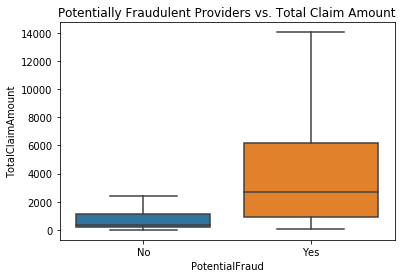

In [11]:
# Total Claim Amount

sns.boxplot(x='PotentialFraud', y='TotalClaimAmount', data=train, showfliers=False). \
set_title('Potentially Fraudulent Providers vs. Total Claim Amount')

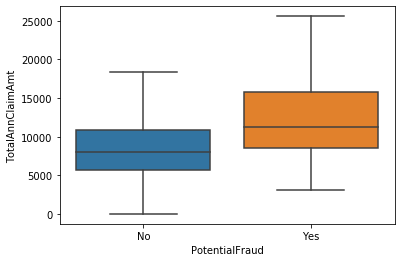

In [6]:
# Total Annual Claim Amount

sns.boxplot(x='PotentialFraud', y='TotalAnnClaimAmt', data=train, showfliers=False)

Text(0.5, 1.0, 'Potential Fraudulent Providers vs. Daily Total Charge')

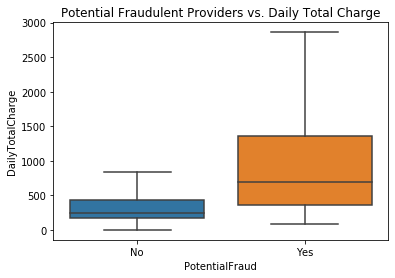

In [13]:
# Daily Total Charge

sns.boxplot(x='PotentialFraud', y='DailyTotalCharge', data=train, showfliers=False). \
set_title('Potential Fraudulent Providers vs. Daily Total Charge')

Text(0, 0.5, 'Unique Group Diag Codes Count')

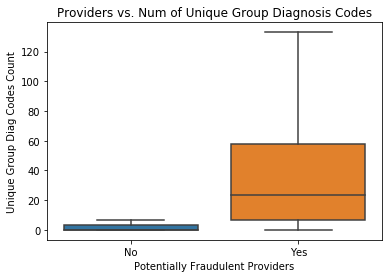

In [123]:
# Unique Group Diagnosis Codes 

sns.boxplot(x='PotentialFraud', y='numDiffGroupDiagCode', \
            data=train, showfliers=False).set_title \
('Providers vs. Num of Unique Group Diagnosis Codes')
plt.xlabel('Potentially Fraudulent Providers')
plt.ylabel('Unique Group Diag Codes Count')

Text(0, 0.5, 'Unique Claim Admit Diag Codes Count')

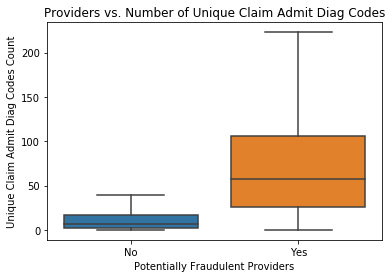

In [125]:
# Unique Claim Admit Diagnosis Codes

sns.boxplot(x='PotentialFraud', y='numDiffDiagnosisCode', \
            data=train, showfliers=False). \
set_title('Providers vs. Number of Unique Claim Admit Diag Codes')
plt.xlabel('Potentially Fraudulent Providers')
plt.ylabel('Unique Claim Admit Diag Codes Count')

# Extra Trees Classifier for Feature Importance

In [25]:
# Label encode the ServiceType Feature for Extra Trees Classifier

le = LabelEncoder()

serviceType = le.fit_transform(train1['ServiceType'])

train1['ServiceType'] = serviceType

train1 = train1.rename(columns={'numDiffDiagnosisCode':'NumUniqClmAdmitDiagCOde',
                                        'numDiffGroupDiagCode':'NumUniqGroupDiagCode'})

In [46]:
# Creating features(X) and target (y)

X4 = train1.drop(columns=['Provider','PotentialFraud'])

y4 = train1[['PotentialFraud']]

y4['PotentialFraud']=y4['PotentialFraud'].replace({'Yes':0,'No':1})

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


[0.01735596 0.02746719 0.02774425 0.01660378 0.03743883 0.0322908
 0.01798602 0.01489374 0.01540106 0.01563461 0.01956237 0.01518629
 0.01496509 0.04515168 0.01639516 0.02980166 0.02337357 0.01669888
 0.02571165 0.01227102 0.02816866 0.05966314 0.08142447 0.01319533
 0.0192544  0.01136225 0.01338707 0.01411989 0.01312435 0.01495472
 0.01668125 0.02643835 0.02043359 0.02154716 0.02705662 0.01879613
 0.02132959 0.01232412 0.00967153 0.00524853 0.02285068 0.02889845
 0.01676318 0.01552982 0.0142996  0.01154348]


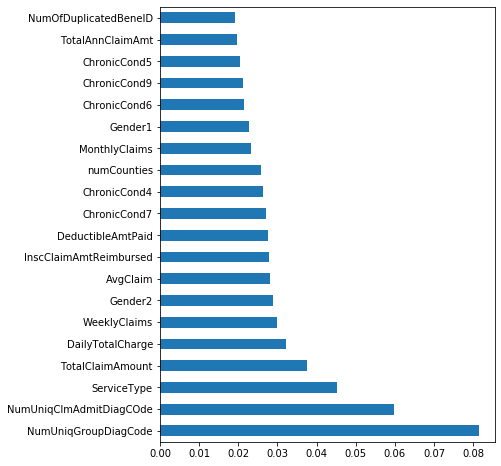

In [51]:
model1 = ExtraTreesClassifier()
model1.fit(X4,y4)
print(model1.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances1 = pd.Series(model1.feature_importances_, index=X4.columns)
feat_importances1.nlargest(20).plot(kind='barh', figsize=(6,8))
plt.show()

# Penalized Lasso Regression for Feature Importance

In [59]:
# label encoding ServiceType Feature

le1 =LabelEncoder()

serviceType3 =le1.fit_transform(train['ServiceType'])

train['ServiceType'] = serviceType3

train=train.rename(columns={'numDiffDiagnosisCode':'NumUniqClmAdmitDiagCOde',
                                        'numDiffGroupDiagCode':'NumUniqGroupDiagCode'})

In [60]:
# creating features(X) and target(y)

X5 = train.drop(columns=['Provider','PotentialFraud'])

y5 = train[['PotentialFraud']]

y5['PotentialFraud']=y5['PotentialFraud'].replace({'Yes':0,'No':1})

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [61]:
# splitting data for model 

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X5,
    y5,
    test_size=0.3,
    random_state=0)

In [62]:
# standardizing data

scaler1 = StandardScaler()
scaler1.fit(X_train1.fillna(0))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [63]:
sel_1 = SelectFromModel(LogisticRegression(C=1, penalty='l1'))
sel_1.fit(scaler1.transform(X_train1.fillna(0)), y_train1)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SelectFromModel(estimator=LogisticRegression(C=1, class_weight=None, dual=False,
                                             fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='warn',
                                             n_jobs=None, penalty='l1',
                                             random_state=None, solver='warn',
                                             tol=0.0001, verbose=0,
                                             warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [65]:
selected_feat1 = X_train1.columns[(sel_1.get_support())]
print('total features: {}'.format((X_train1.shape[1])))
print('selected features: {}'.format(len(selected_feat1)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_1.estimator_.coef_ == 0)))

total features: 55
selected features: 42
features with coefficients shrank to zero: 13


In [66]:
# Features Removed by Lasso Regression

removed_feats1 = X_train1.columns[(sel_1.estimator_.coef_ == 0).ravel().tolist()]
removed_feats1

Index(['TotalClaimAmount', 'NumOfPatients', 'AvgClaim', 'ChronicCond10',
       'Gender2', 'Race1', 'NumDistincOtherPhy', 'NumDistincClmDiagCode1',
       'NumDistincClmDiagCode2', 'NumDistincClmDiagCode4',
       'NumDistincClmDiagCode5', 'NumDistincClmDiagCode8',
       'NumDistincClmDiagCode9'],
      dtype='object')

# Logistic Regression to Assess Feature Strength/Validity of Engineered Features

In [83]:
train3 = pd.read_pickle("train_dataset2.pkl")

In [78]:
logit = linear_model.LogisticRegression(solver='liblinear', penalty='l1')

In [84]:
train3['PotentialFraud'] = train3['PotentialFraud'].replace({'No':0,'Yes':1})

In [85]:
# dummify ServiceType feature

dummy = pd.get_dummies(train3['ServiceType'], drop_first=True)

train4 = pd.concat([train3, dummy], axis=1).drop('ServiceType', axis=1)

In [86]:
train4['PotentialFraud'].value_counts()

0    4904
1     506
Name: PotentialFraud, dtype: int64

In [87]:
# upsample minority class

minorIndex4 = train4[train4['PotentialFraud']==1].index

resampled4 = resample(minorIndex4, n_samples=4904-506)

resampled_minor4 = train4.iloc[resampled4]

train4_data_resampled = pd.concat([train4, resampled_minor4], axis=0)

In [88]:
train4_data_resampled['PotentialFraud'].value_counts()

1    4904
0    4904
Name: PotentialFraud, dtype: int64

In [95]:
# standardize feature 

X11 = train4_data_resampled[['NumOfDuplicatedBeneID', 'ChronicCond12']]
scaled_X = scale(X11)
Y10 = train4_data_resampled['PotentialFraud']

In [96]:
np.random.seed(10)

X_train11, X_test11, y_train10, y_test10 = train_test_split(scaled_X, Y10, \
                                                            test_size=0.2, random_state=42, stratify=Y10)

In [97]:
logit.fit(X_train11,y_train10)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [98]:
# scores for model when using 2 least important features

print(logit.score(X_train11,y_train10))
print(logit.score(X_test11,y_test10))

0.6451695131277084
0.6309887869520897


In [106]:
X13 = train4_data_resampled[['NumOfDuplicatedBeneID', 'ChronicCond12','TotalClaimAmount']]
scaled_X13 = scale(X13)

np.random.seed(13)

X_train13, X_test13, y_train10, y_test10 = train_test_split(scaled_X13, Y10, \
                                                            test_size=0.2, random_state=42, stratify=Y10)

logit13= linear_model.LogisticRegression(solver='liblinear', penalty='l1')

In [107]:
logit13.fit(X_train13,y_train10)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [108]:
# scores for model when one of the top 4 features added (Total Claim Amount)

print(logit13.score(X_train13,y_train10))
print(logit13.score(X_test13,y_test10))

0.7606423655365792
0.7594291539245668


In [112]:
X15 = train4_data_resampled[['NumOfDuplicatedBeneID', 'ChronicCond12','numDiffGroupDiagCode','TotalClaimAmount']]
scaled_X15 = scale(X15)

np.random.seed(15)

X_train15, X_test15, y_train10, y_test10 = train_test_split(scaled_X15, Y10, \
                                                            test_size=0.2, random_state=42, stratify=Y10)

logit15= linear_model.LogisticRegression(solver='liblinear', penalty='l1')

In [113]:
logit15.fit(X_train15,y_train10)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [114]:
# scores for model when most important feature added (Number of Unique Group Diagnosis Codes)

print(logit15.score(X_train15,y_train10))
print(logit15.score(X_test15,y_test10))

0.8478205455008921
0.8486238532110092


# Bar Graph of Different Datasets and Number of Features

In [69]:
a = {'Datasets': ['Full Dataset','Combined Dataset', \
                  'Engineered Dataset','Final Dataset'], 'Features': [79,55,57,42]}
df1 = pd.DataFrame(data=a)

Text(0.5, 1.0, 'Datasets Created vs. Number of Features')

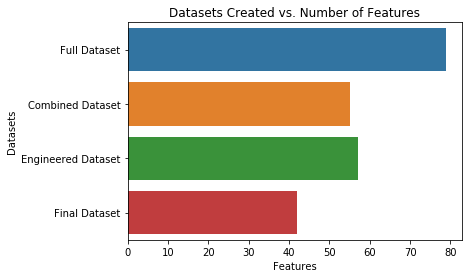

In [74]:
sns.barplot(x=df1['Features'], \
            y=df1['Datasets'], \
            data=df1).set_title('Datasets Created vs. Number of Features')